# Chuvas em Fortaleza

Projeto final da disciplina **Forecasting**

#### **Aluna:** Fernanda de Queiroz Souza

*Fonte: https://github.com/Eraylson/series_temporais*

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
import os
import datetime
from datetime import datetime, date, time, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import  warnings 
warnings.simplefilter('ignore')

In [3]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Leitura dos dados

In [4]:
original_path = os.getcwd()
original_path

'C:\\Users\\Fernanda.Souza\\OneDrive - Unilever\\Documents\\Jupyter\\MBA\\MBA_Forecasting'

In [5]:
os.chdir('C:/Users/Fernanda.Souza/OneDrive - Unilever/Documents/Jupyter/MBA/MBA_Forecasting/ProjetoFinal')

In [45]:
df = pd.read_excel('chuva_fortaleza.xlsx')

## Análise dos dados

In [46]:
df

,Year,Milimitros
0,1850,852
1,1851,1806
2,1852,1356
3,1853,1233
4,1854,1590
...,...,...
125,1975-01-01 00:00:00,1778
126,1976-01-01 00:00:00,1417
127,1977-01-01 00:00:00,1941
128,1978-01-01 00:00:00,1752


In [47]:
df['Year'].value_counts()

1850                   1
1947-01-01 00:00:00    1
1945-01-01 00:00:00    1
1944-01-01 00:00:00    1
1943-01-01 00:00:00    1
                      ..
1888                   1
1887                   1
1886                   1
1885                   1
1979-01-01 00:00:00    1
Name: Year, Length: 130, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        130 non-null    object
 1   Milimitros  130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Anotação: pegar o notebook 03B para se basear para o ARIMA

In [49]:
df['Year'] = df['Year'].astype(str)

In [50]:
df['Year'] = df['Year'].str[0:4]
df

,Year,Milimitros
0,1850,852
1,1851,1806
2,1852,1356
3,1853,1233
4,1854,1590
...,...,...
125,1975,1778
126,1976,1417
127,1977,1941
128,1978,1752


In [51]:
# Conferindo se realmente não tem nenhum dado faltante na série

print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


## Análise da série

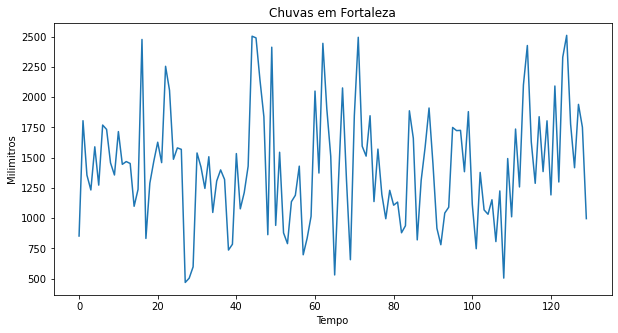

In [52]:
plt.figure(figsize=(10,5))
plt.title('Chuvas em Fortaleza')
plt.xlabel("Tempo")
plt.ylabel("Milimitros")
plt.plot(df['Milimitros'])

In [53]:
df.set_index('Year',inplace=True)
df.index=pd.to_datetime(df.index)

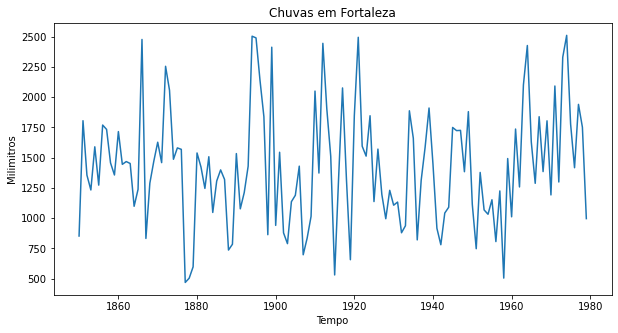

In [54]:
plt.figure(figsize=(10,5))
plt.title('Chuvas em Fortaleza')
plt.xlabel("Tempo")
plt.ylabel("Milimitros")
plt.plot(df['Milimitros'])

In [55]:
df_decomp = tsa.seasonal_decompose(df, period=12)

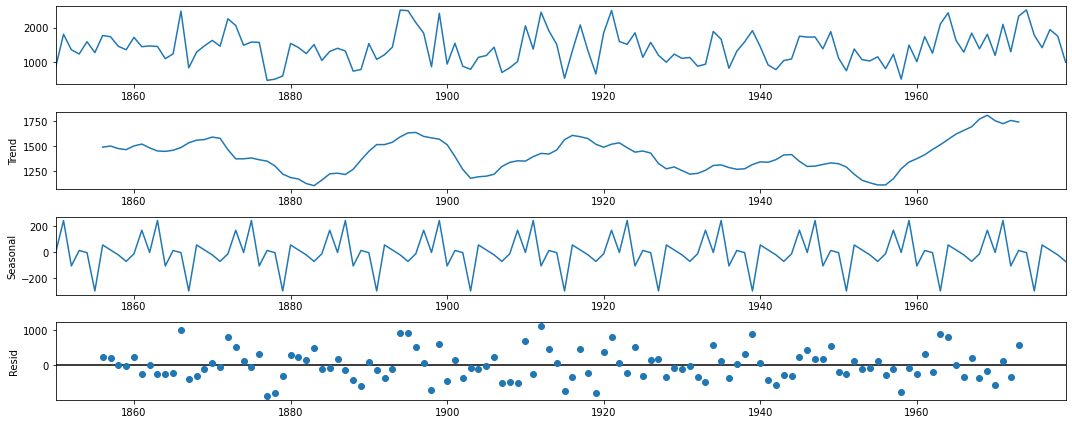

In [56]:
df_decomp.plot();

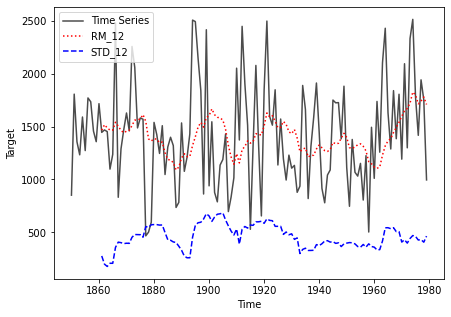

In [57]:
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df['Milimitros'], color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

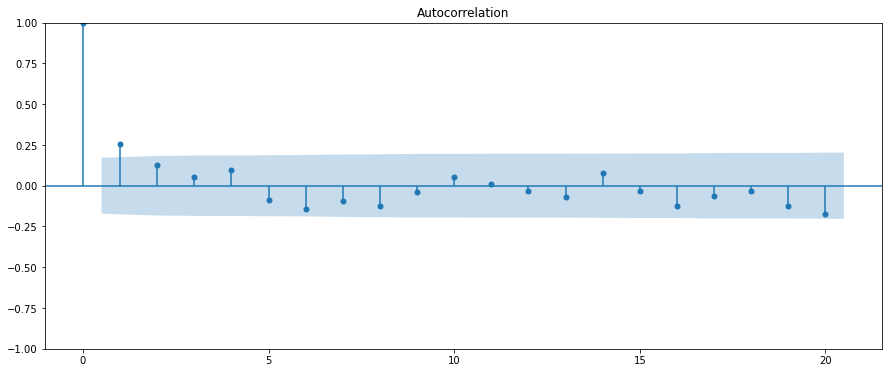

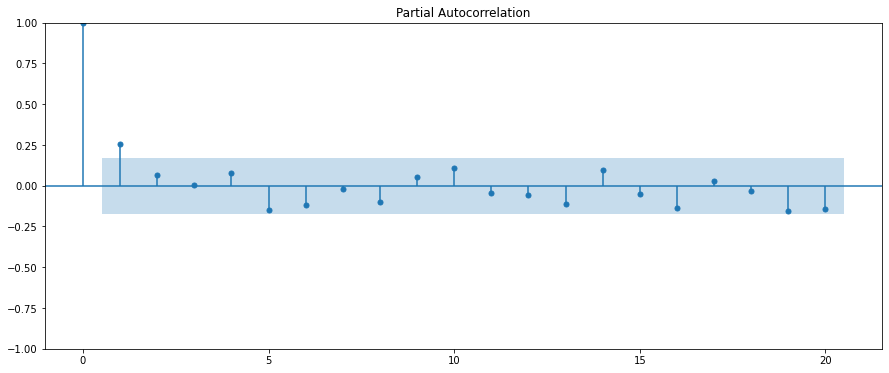

In [59]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

In [65]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (5%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        print('estacionária')
    else:
        print(df_output[0])
        print('não estacionária')

In [66]:
teste_df(df.values)

Test Statistic        -8.705081e+00
p-value                3.719028e-14
#Lags                  0.000000e+00
Nº Observações         1.290000e+02
Valor Crítico (1%)    -3.482088e+00
Valor Crítico (5%)    -2.884219e+00
Valor Crítico (10%)   -2.578864e+00
dtype: float64
estacionária


## Pré - processamento

## LIXO

In [58]:
#adf = adfuller(df)
#print(f'p-valor: {round(adf[1],2)}')

### Eliminação da Tendência por Diferenciação

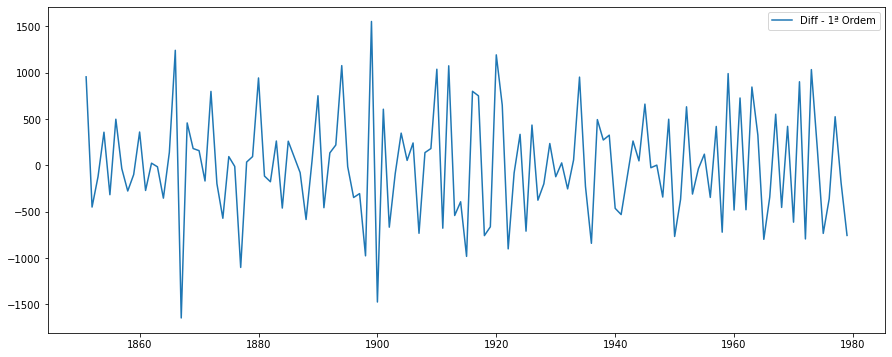

In [60]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

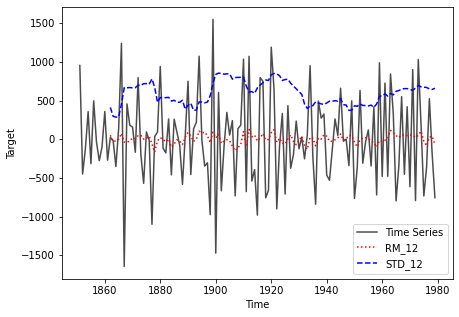

In [61]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df['Milimitros'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

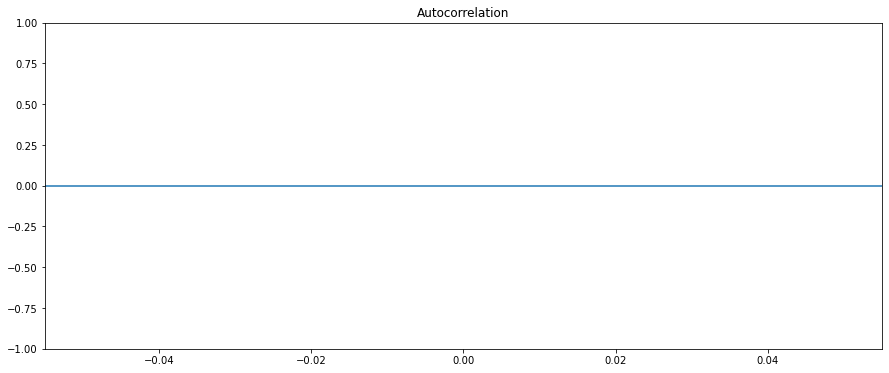

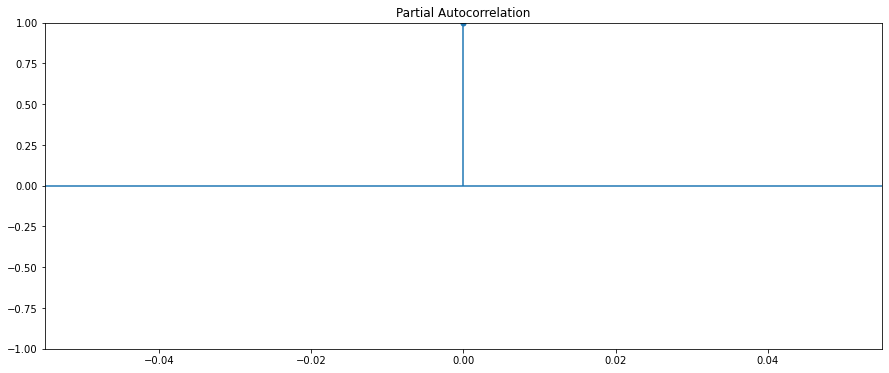

In [63]:
plot_acf(df_1ordem, lags=50)
plot_pacf(df_1ordem, lags=50)
plt.show()

In [64]:
df_decomp_1ordem = tsa.seasonal_decompose(df_1ordem, period=12)
df_decomp_1ordem.plot();

ValueError: This function does not handle missing values

In [60]:
#df_logged = df["ncasos"].apply(lambda x : np.log(x))

#ax1 = plt.subplot()
#df_logged.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);

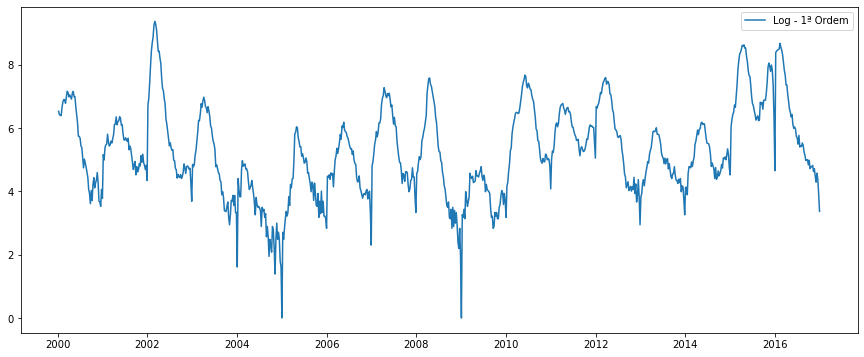

In [59]:
df_logg = np.log(df)
plt.plot(df_logg, label = "Log - 1ª Ordem")
plt.legend(loc = 'best')
plt.show()

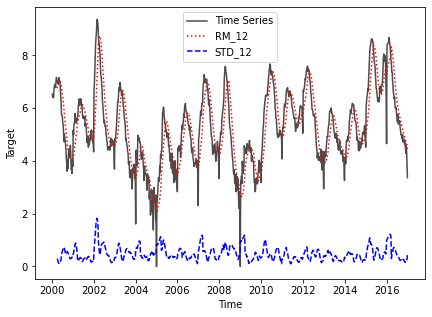

In [61]:
rolmean12 = np.log(df).rolling(window = 12).mean()
rolstd12 = np.log(df).rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

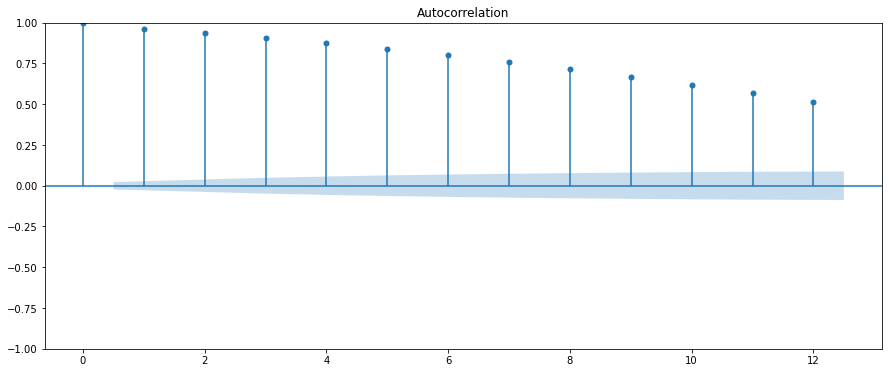

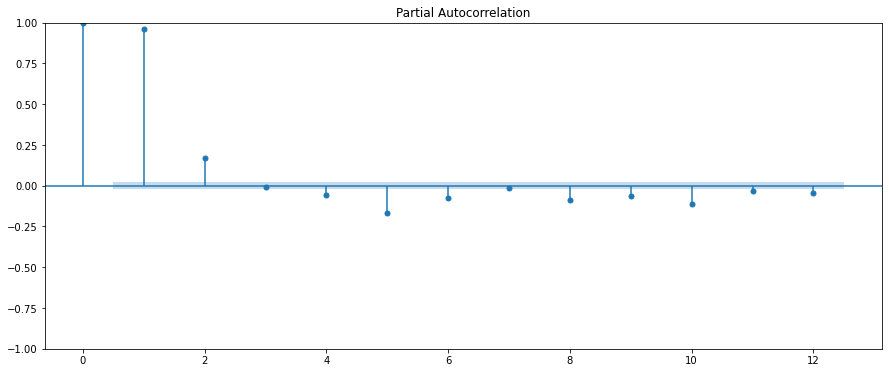

In [62]:
plot_acf(df_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_logg.dropna(), lags=12, alpha=0.5);

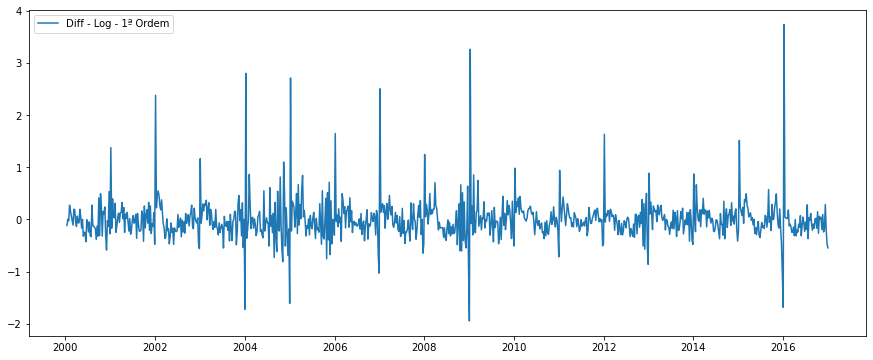

In [66]:
df_diff_logg = df_logg.diff()
plt.plot(df_diff_logg, label="Diff - Log - 1ª Ordem")
plt.legend(loc='best')
plt.show()

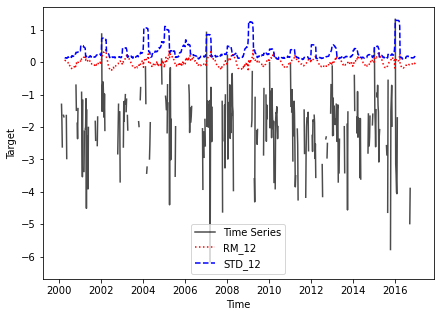

In [68]:
rolmean12 = df_diff_logg.rolling(window = 12).mean()
rolstd12 = df_diff_logg.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df_diff_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [67]:
#df_logg2 = np.log(df_logg)
#plt.plot(df_logg, label = "Log - 2ª Ordem")
#plt.legend(loc = 'best')
#plt.show()

In [69]:
#rolmean12 = np.log(df_logg).rolling(window = 12).mean()
#rolstd12 = np.log(df_logg).rolling(window = 12).std()
#plt.figure(figsize=(7, 5))
#actual = plt.plot(np.log(df_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
#rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
#std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
#plt.legend(loc='best')
#plt.xlabel("Time")
#plt.ylabel("Target")
#plt.show()

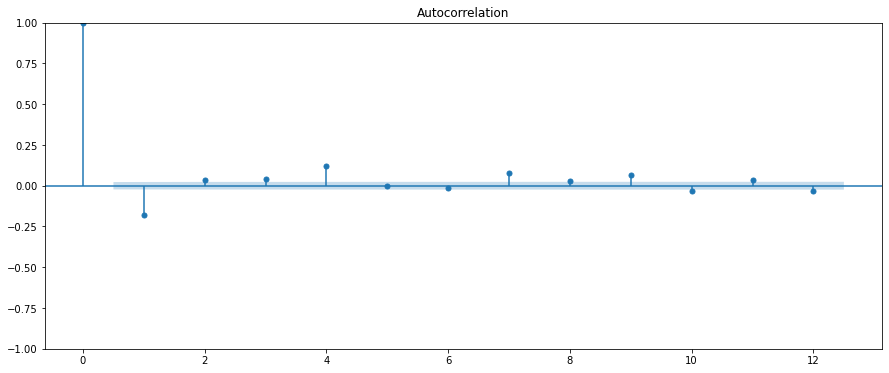

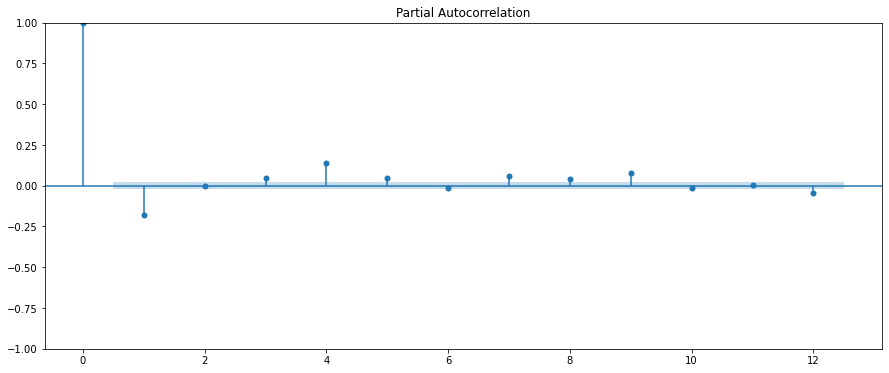

In [70]:
plot_acf(df_diff_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_diff_logg.dropna(), lags=12, alpha=0.5);